In [1]:
# from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people(min_faces_per_person=60)

# faces.DESCR

In [2]:
import cv2
import os
import random
import zipfile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [3]:


def load_dataset(path, image_size):

    images = []
    labels = []

    for label_name in os.listdir(path):
        target_path = os.path.join(path, label_name)

        if len([f for f in os.listdir(target_path)]) > 1:
            for filename in os.listdir(target_path):
                file_path = os.path.join(target_path, filename)
                # image = Image.open(file_path)
                image = cv2.imread(file_path)
                image = cv2.resize(image, image_size)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                images.append(image.flatten())
                labels.append(label_name)

    return images, labels


path = 'cropped_dataset'
image_size = (100, 100)
dataset = load_dataset(path, image_size)

print(
    f"dataset length = {len(dataset[0])}, image shape = {dataset[0][0].shape}, first label = {dataset[1][0]}")

dataset length = 529, image shape = (10000,), first label = Abdissa Degefu


In [4]:
# import matplotlib.pyplot as plt

# fig, splts = plt.subplots(2, 4)
# for i, splts in enumerate(splts.flat):
#     splts.imshow(faces.images[i], cmap='gray')
#     splts.set(xticks=[], yticks=[],
#             xlabel=faces.target_names[faces.target[i]])

In [5]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder


dataset = load_dataset(path, image_size)
images, labels = dataset

# Convert lists to NumPy arrays
X = np.array(images)
y = np.array([labels.index(label) for label in labels])


# # Categorical label encoding
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)

# # One-hot encoding
# onehot_encoder = OneHotEncoder(sparse=False)
# encoded_labels_onehot = onehot_encoder.fit_transform(
#     encoded_labels.reshape(-1, 1))

# # Store the one-hot encoded labels and mapping in the dataset
# label_mapping = dict(zip(label_encoder.classes_, encoded_labels_onehot.T))
# new_dataset = (images.tolist(), encoded_labels_onehot.tolist(), label_mapping)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# # Decode the one-hot encoded labels back to their original form
# training_labels = label_encoder.inverse_transform(np.argmax(y_train, axis=1))
# testing_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
print(labels)
training_labels = [labels[i] for i in y_train]
testing_labels = [labels[i] for i in y_test]

print("Original Labels in Training Set:")
print(training_labels[:5])
print(f"Training Set Length: {len(y_train)}")
print("Original Labels in Testing Set:")
print(testing_labels[:5])
print(f"Testing Set Length: {len(y_test)}")

# Print the label mapping
# print("Label Mapping:", label_mapping)

['Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdissa Degefu', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abdurahman Muhammed', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Abraham Wendmeneh', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amanuel Beyene', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Amir Ahmedin', 'Ananiya_Tesfahun', 'Ananiya_Tesfahun',

In [6]:
len(list(set(y)))

50

In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# For dimensionality reduction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced', decision_function_shape='ovo')
model = make_pipeline(pca, svc)

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc',
                 SVC(class_weight='balanced', decision_function_shape='ovo'))])

In [9]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)

accuracy_score(predictions, y_test)

0.8962264150943396

In [10]:
p_ = [labels[pred] for pred in predictions]
a_ = [labels[pred] for pred in y_test]

for i in range(len(p_)):
    print(p_[i], a_[i])

Milion Tolesa Milion Tolesa
Sahib Semahegn Husen Yusuf
Amanuel Beyene Amanuel Beyene
Etsubdink Awoke Etsubdink Awoke
Bethelhem Yemane Bethelhem Yemane
Yohannes Desta Yohannes Desta
Semir Hamid Semir Hamid
Ananiya_Tesfahun Gedion Ezra
Olyad Temesgen Olyad Temesgen
Tiruzer Tsedeke Tiruzer Tsedeke
Ephrem_Shimels Ephrem_Shimels
Tewodros Berhanu Tewodros Berhanu
Esayas Nigussie Esayas Nigussie
Nathnael Dereje Nathnael Dereje
Leul Degarege Leul Degarege
Deribew_Shimels Deribew_Shimels
Ephrem_Shimels Ephrem_Shimels
Abraham Wendmeneh Dawit_Abebe
Fraol Mulugeta Fraol Mulugeta
Fasika_Fikadu Fasika_Fikadu
Gelila Tefera Gelila Tefera
Yohannes Dessie Yohannes Dessie
Yosef Aweke Yosef Aweke
Biniyam Haile Biniyam Haile
Melkishi Tesfaye Melkishi Tesfaye
Naol Taye Naol Taye
Fasika_Fikadu Fasika_Fikadu
Melkishi Tesfaye Melkishi Tesfaye
Milka Fasika Milka Fasika
Yosef Aweke Yosef Aweke
Sosina Esayas Sosina Esayas
Bethelhem Yemane Bethelhem Yemane
Yosef Ayele Yosef Ayele
Fraol Mulugeta Kidus Hunegnaw
Beth

In [11]:
# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

testset = []

for filename in os.listdir('TestImages'):
    if filename.endswith(('.jpg', '.jpeg', '.png')):

        image_path = os.path.join(
            'TestImages', filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect faces in the image
        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=1.3, minNeighbors=5)

        # Process each detected face
        for i, (x, y, w, h) in enumerate(faces):
            face_roi = image[y:y+h, x:x+w]
            face_roi = cv2.resize(cv2.cvtColor(
                face_roi, cv2.COLOR_BGR2GRAY), image_size)
            testset.append(face_roi.flatten())
            # showImage(face_roi, face_roi.shape, label="face")
            # Save each cropped face with a unique filename
testset = np.array(testset)

In [12]:
# # testimages, labels = load_dataset('testImages', image_size)
test_pred = model.predict(testset)

In [13]:
def showImage(img, shape, label, cmap='gray'):
    plt.subplot(3, 6, 1)
    plt.title(label)
    plt.imshow(img.reshape(shape), cmap=cmap)
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',
                    top='off', right='off', left='off', which='both')
    plt.show()

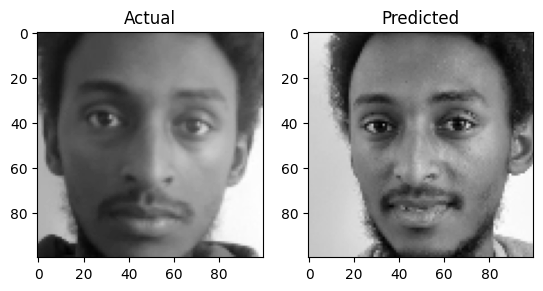

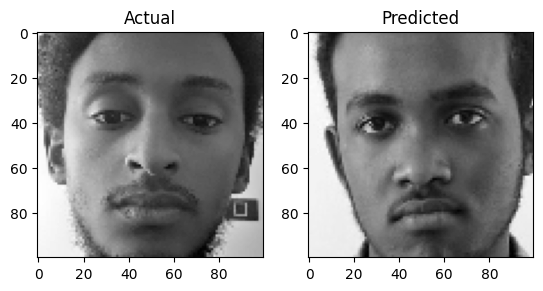

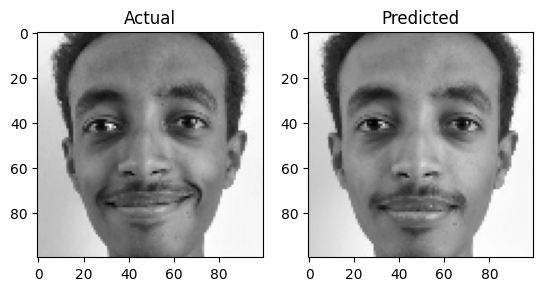

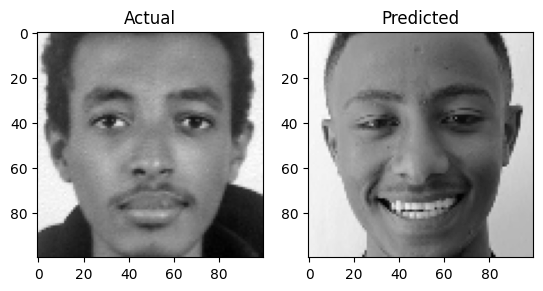

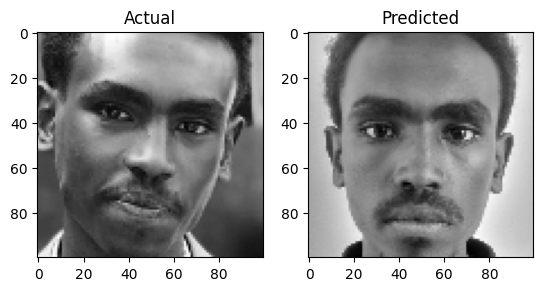

In [14]:
for i, pred in enumerate(test_pred):
    plt.subplot(1, 2, 1)
    plt.imshow(testset[i].reshape(image_size), cmap='gray')
    plt.title('Actual')

    plt.subplot(1, 2, 2)
    plt.imshow(X[pred].reshape(image_size), cmap='gray')
    plt.title('Predicted')

    plt.show()

In [15]:
testimages, labels = load_dataset('A TEST SET', image_size)
test_set_multiple = []
for testimg in testimages:
    faces = face_cascade.detectMultiScale(
        cv2.resize(testimg, image_size), scaleFactor=1.3, minNeighbors=5)

    # Process each detected face
    for i, (x, y, w, h) in enumerate(faces):
        face_roi = image[y:y+h, x:x+w]
        face_roi = cv2.resize(cv2.cvtColor(
            face_roi, cv2.COLOR_BGR2GRAY), image_size)
        test_set_multiple.append(face_roi.flatten())
test_set_multiple = np.array(test_set_multiple)
test_set_multiple.shape

(0,)

In [16]:
# Load the pre-trained face detector
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

test_set_multiple = []
counter = 0
for testlabel in os.listdir('A TEST SET'):
    if len(os.listdir(os.path.join('A TEST SET', testlabel))) == 0:
        continue
    detected = []
    for filename in os.listdir(os.path.join('A TEST SET', testlabel)):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            counter += 1
            image_path = os.path.join(
                'A TEST SET', testlabel, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(
                gray, scaleFactor=1.3, minNeighbors=5)

            # Process each detected face

            for i, (x, y, w, h) in enumerate(faces):
                face_roi = image[y:y+h, x:x+w]
                face_roi = cv2.resize(cv2.cvtColor(
                    face_roi, cv2.COLOR_BGR2GRAY), image_size)
                detected.append((face_roi.flatten(), len(face_roi.flatten())))
        if detected:
            test_set_multiple.append(max(detected, key=lambda x: x[1])[0])
            detected = []
            # showImage(face_roi, face_roi.shape, label="face")
            # Save each cropped face with a unique filename
test_set_multiple = np.array(test_set_multiple)
print(counter)
test_set_multiple.shape

31


(28, 10000)

In [17]:
# for img in test_set_multiple:
#     showImage(img, image_size, 'img')

In [18]:
import pickle

# Save the model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open('svm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [19]:
testsetmult_pred = model.predict(test_set_multiple)

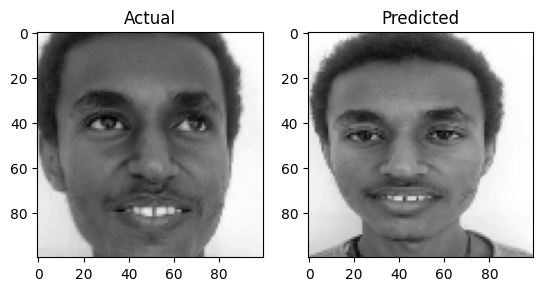

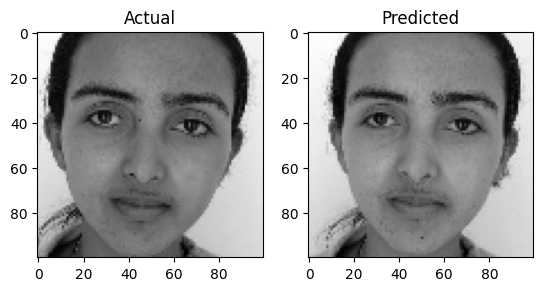

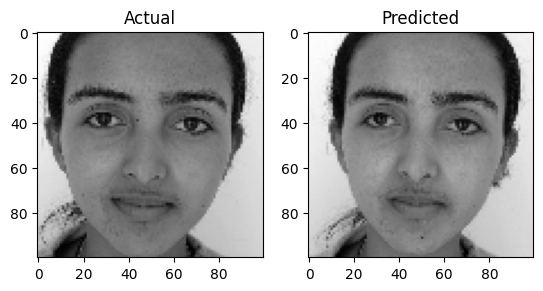

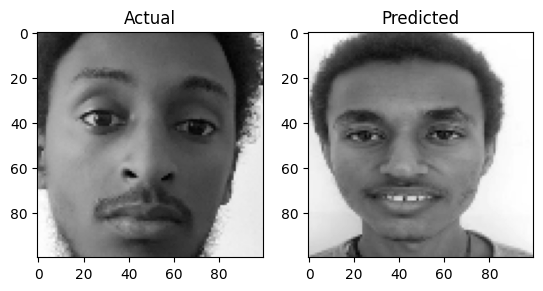

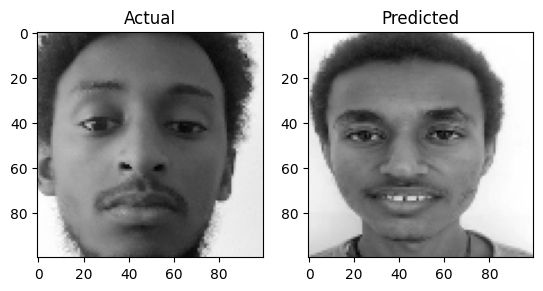

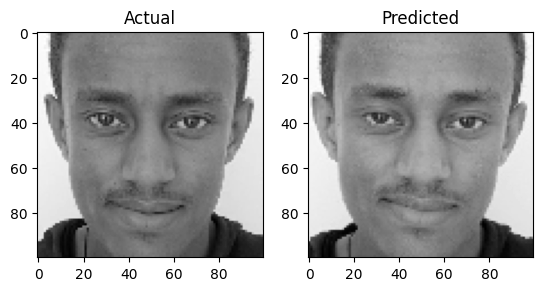

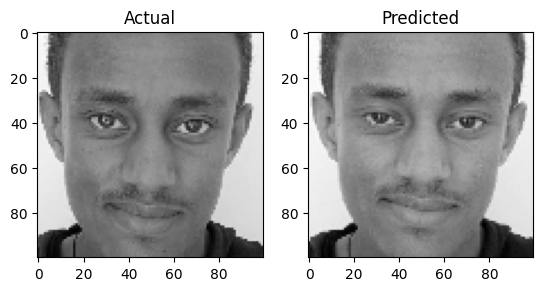

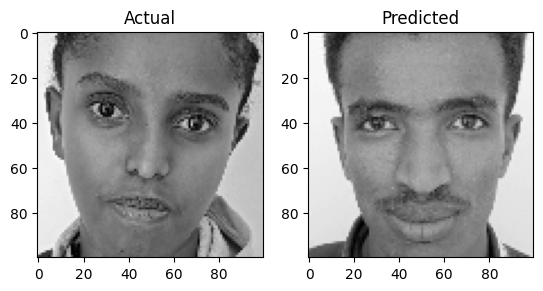

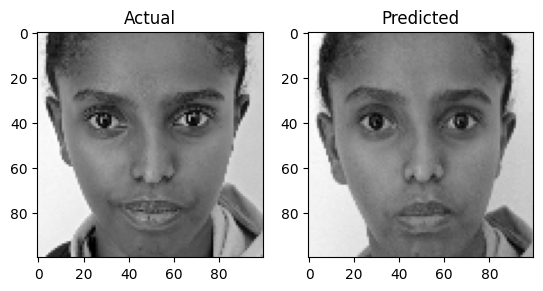

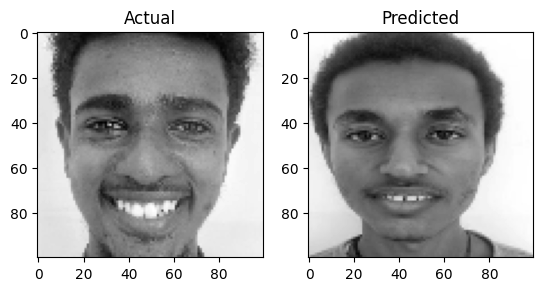

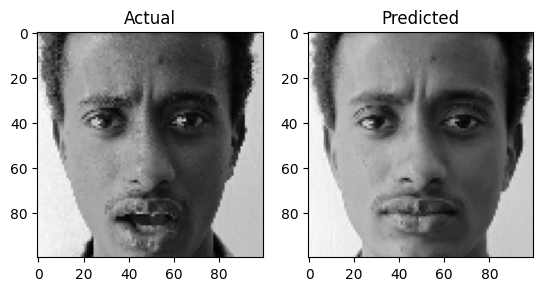

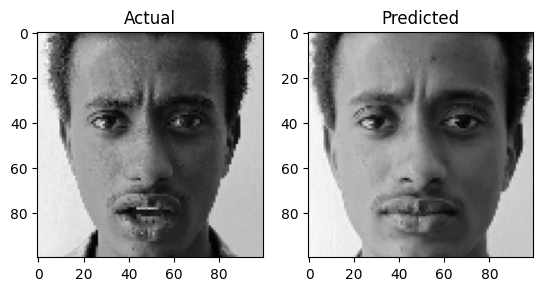

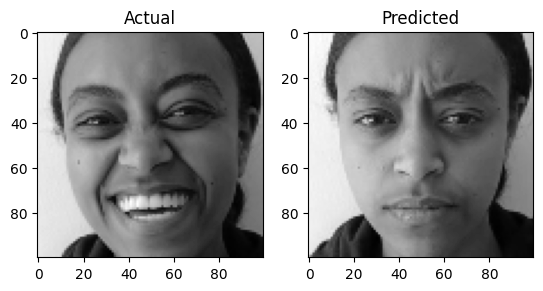

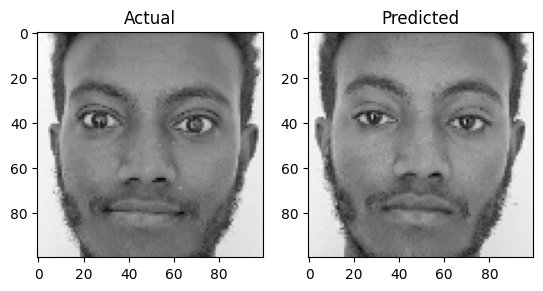

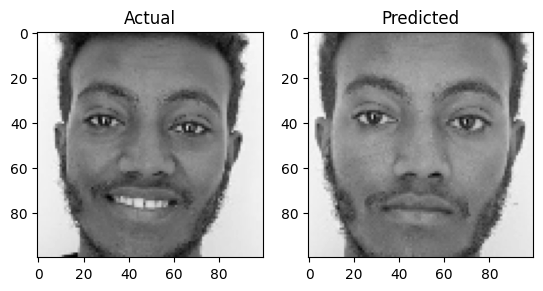

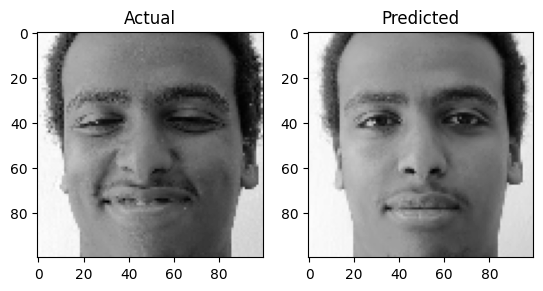

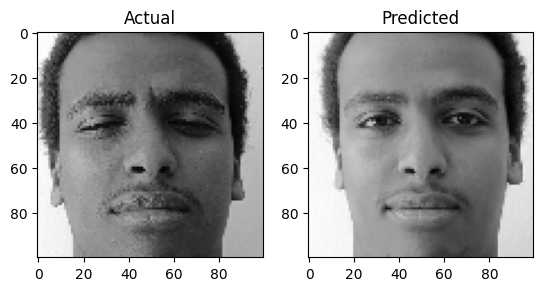

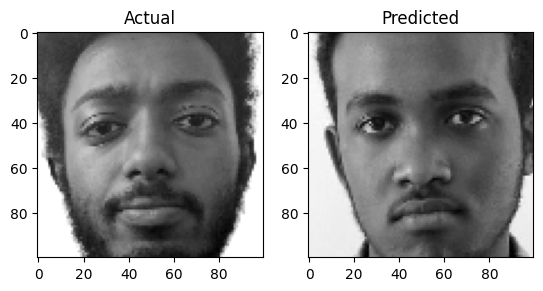

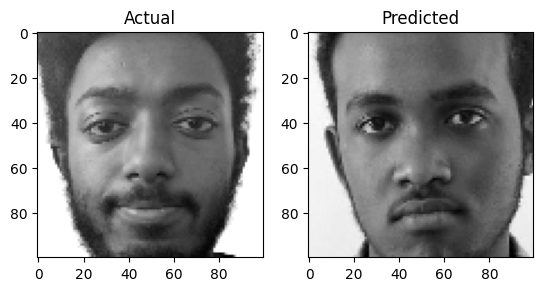

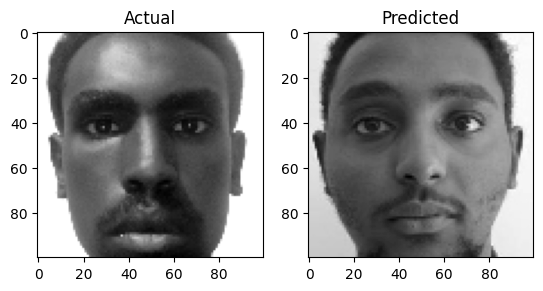

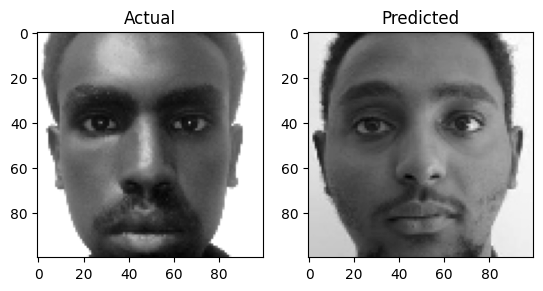

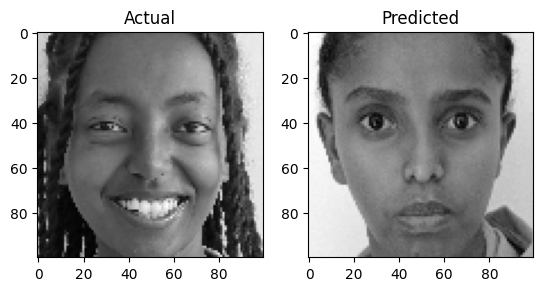

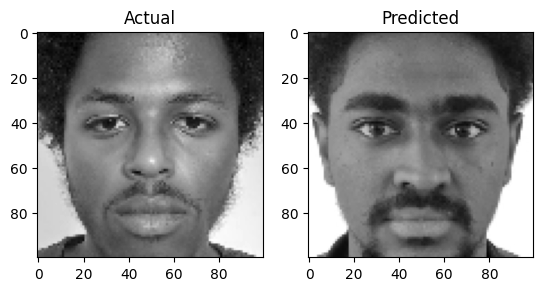

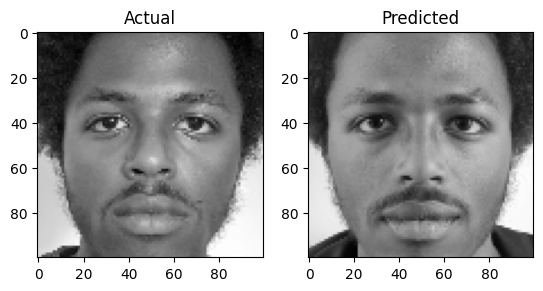

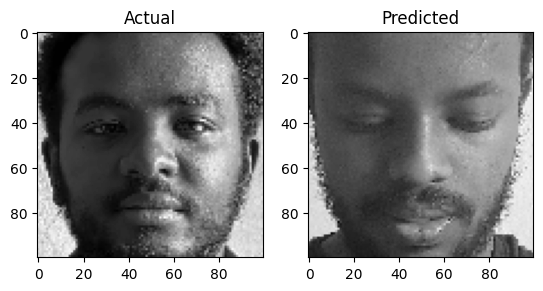

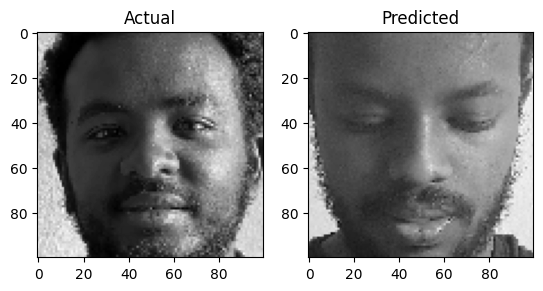

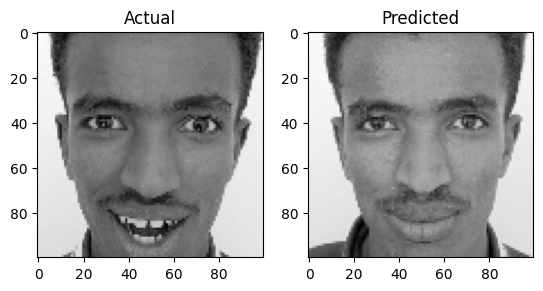

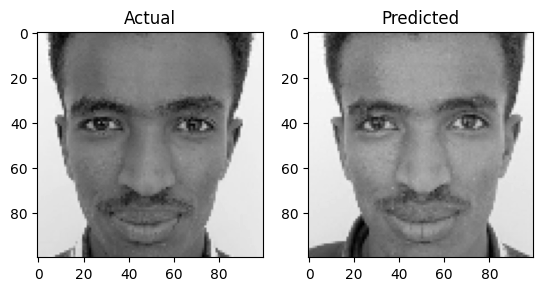

In [20]:
for i, pred in enumerate(testsetmult_pred):
    plt.subplot(1, 2, 1)
    plt.imshow(test_set_multiple[i].reshape(image_size), cmap='gray')
    plt.title('Actual')

    plt.subplot(1, 2, 2)
    plt.imshow(X[pred].reshape(image_size), cmap='gray')
    plt.title('Predicted')

    plt.show()